## 1-)Kütüphanler & Grafik Ayarları

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarları
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

## 2-) Veri Seti Yükleme 

In [3]:
df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Analyzing_Titanic_Data_Sets/Data_Set/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3-) Veri Setini Tanıma (Data Understanding)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [5]:
df.shape

(418, 12)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    str    
 4   Sex          418 non-null    str    
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    str    
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     str    
 11  Embarked     418 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 39.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [9]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [13]:
print(df['Survived'].sum())

152


## 4-) Eksik Verileri Analiz Etme

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
df['Age'].mean()

np.float64(30.272590361445783)

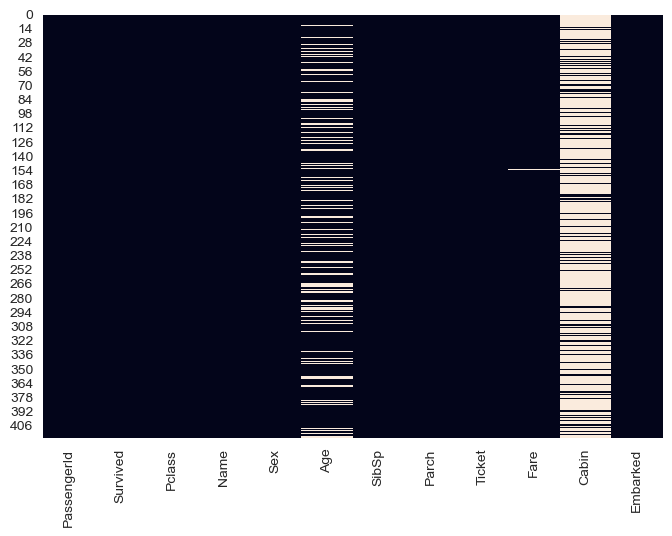

In [35]:
sns.heatmap(df.isnull(), cbar= False)
plt.show()

In [37]:
df = df.drop(columns='Cabin')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='str')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [47]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


## 5-) Hedef Değişken Analizi (Survived)

In [57]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

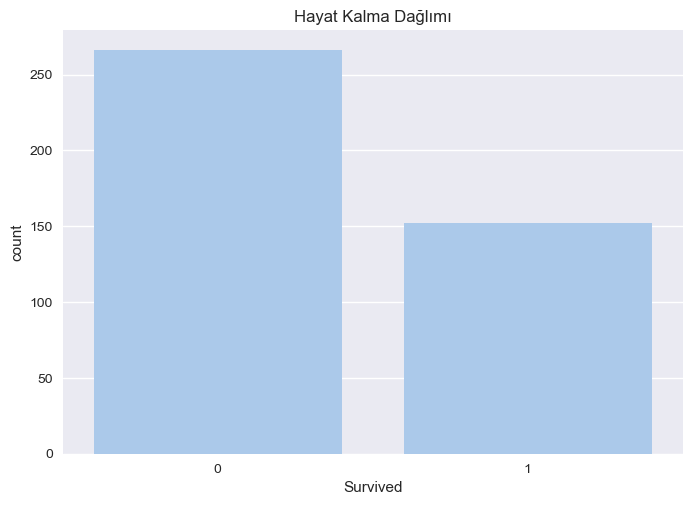

In [64]:
sns.countplot(data = df, x = 'Survived',)
plt.title('Hayat Kalma Dağlımı')
plt.show()

## 6-) Kategorik Değişken Analizi

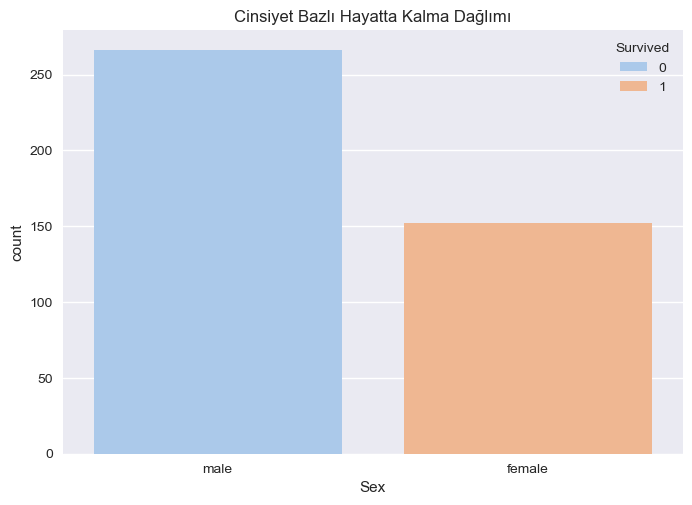

In [67]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title('Cinsiyet Bazlı Hayatta Kalma Dağlımı')
plt.show()

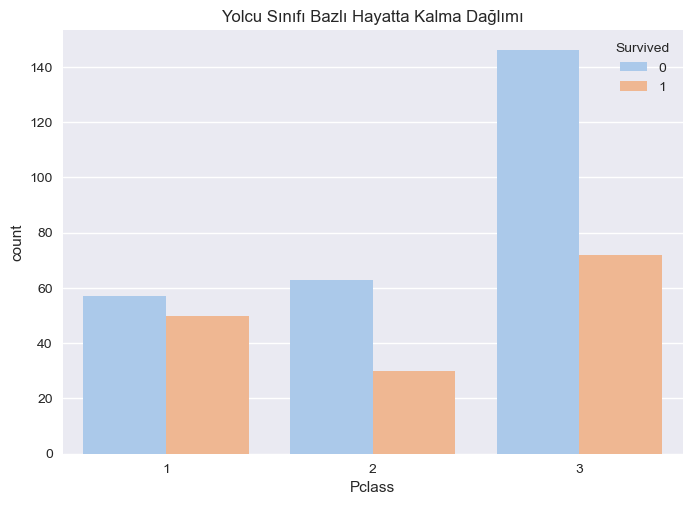

In [68]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title('Yolcu Sınıfı Bazlı Hayatta Kalma Dağlımı')
plt.show()

## 7) Sayısal Değişken Analizi

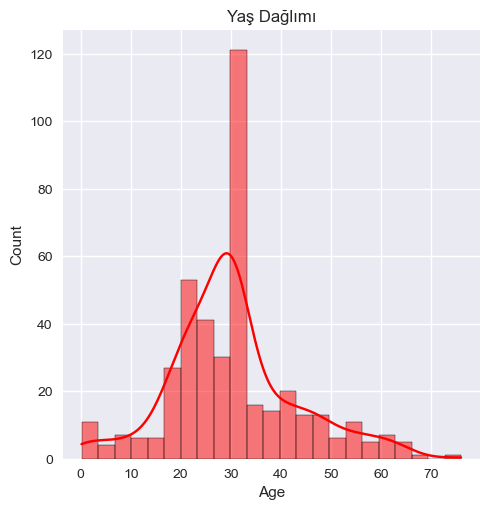

In [72]:
sns.displot(data = df, x = 'Age', kde = True, color= 'red')
plt.title('Yaş Dağlımı')
plt.show()

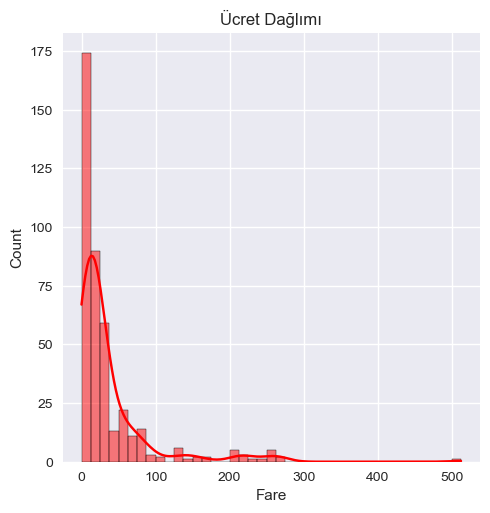

In [73]:
sns.displot(data = df, x = 'Fare', kde = True, color= 'red')
plt.title('Ücret Dağlımı')
plt.show()

## 8-) Korelasyon Analizi

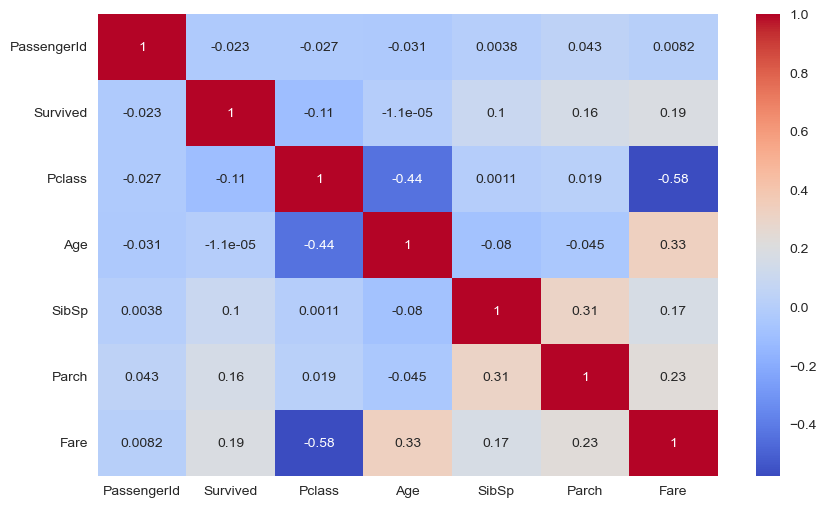

In [76]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

## 9) Feature Engineering (Özellik Üretme)

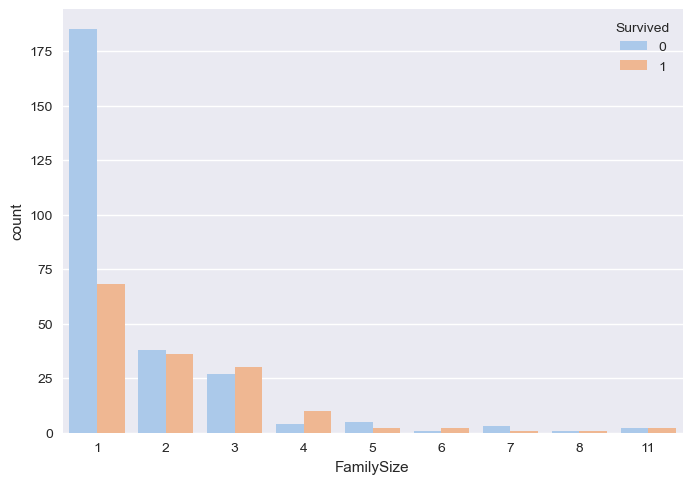

In [77]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.show()

In [95]:
def family_category(size):
    if size == 1:
        return "Alone"
    elif size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyCategory"] = df["FamilySize"].apply(family_category)

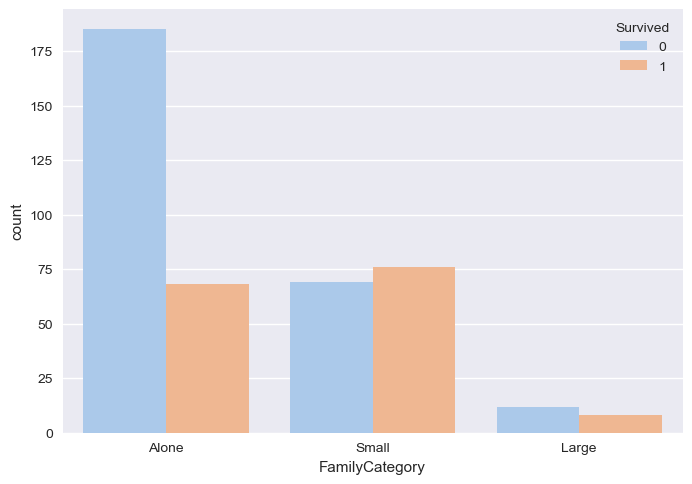

In [111]:
sns.countplot(x="FamilyCategory", hue='Survived', data=df)
plt.show();

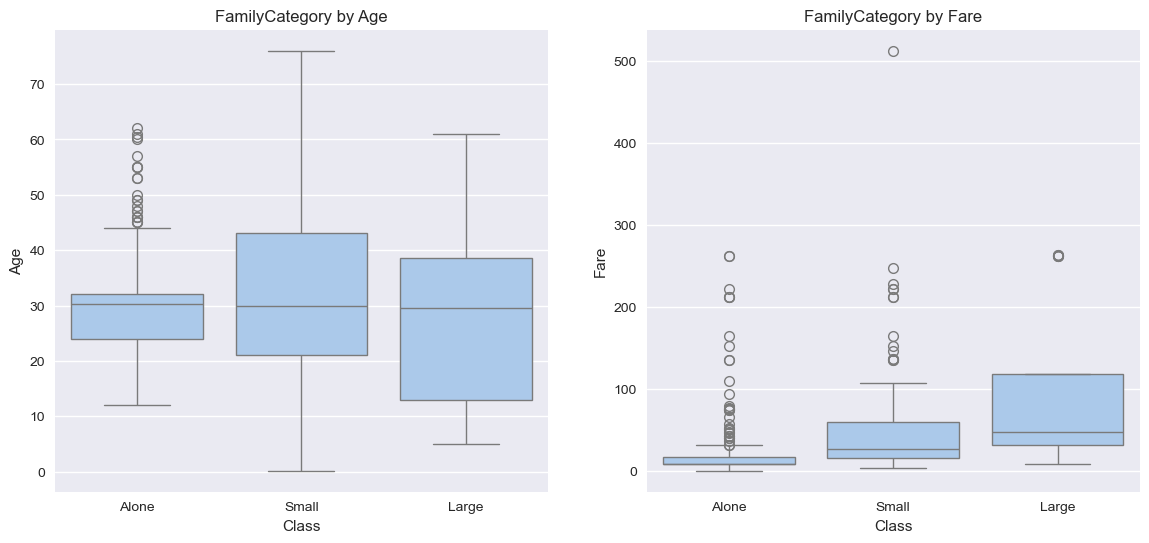

In [117]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x= 'FamilyCategory', y = 'Age', data = df)
plt.title('FamilyCategory by Age')
plt.xlabel('Class')
plt.ylabel('Age')

plt.subplot(1,2,2)
sns.boxplot(x='FamilyCategory', y = 'Fare', data = df)
plt.title('FamilyCategory by Fare')
plt.xlabel('Class')
plt.ylabel('Fare')

plt.show()

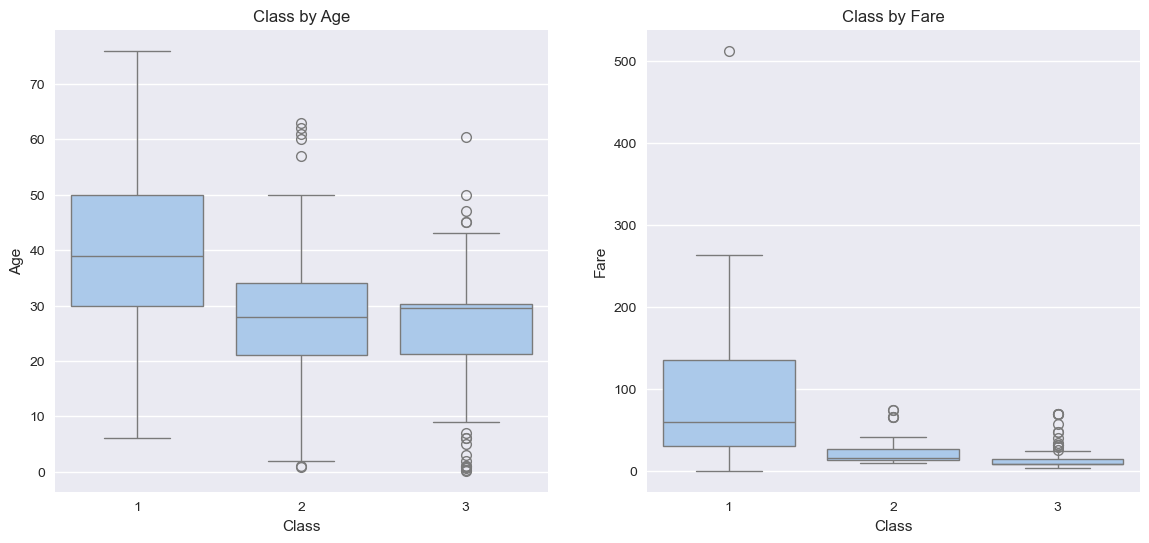

In [116]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x= 'Pclass', y = 'Age', data = df)
plt.title('Class by Age')
plt.xlabel('Class')
plt.ylabel('Age')

plt.subplot(1,2,2)
sns.boxplot(x='Pclass', y = 'Fare', data = df)
plt.title('Class by Fare')
plt.xlabel('Class')
plt.ylabel('Fare')

plt.show()

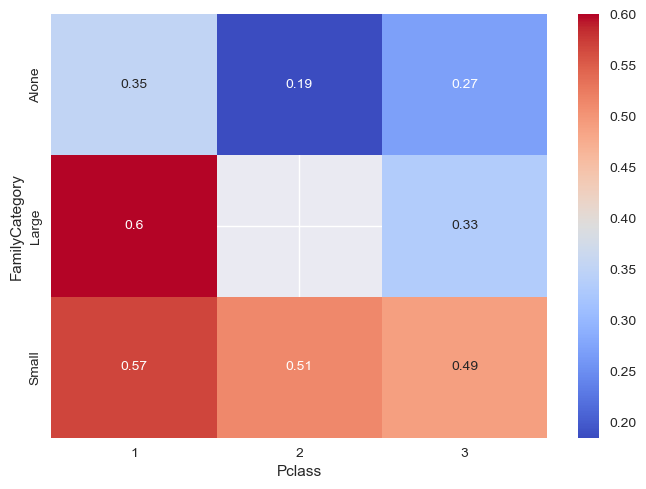

In [118]:
# Survival oranı
df.groupby("FamilyCategory")["Survived"].mean()

# Heatmap pivot
pivot = pd.pivot_table(
    df,
    values="Survived",
    index="FamilyCategory",
    columns="Pclass"
)

sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.show()
